# Statistical Learning - Support Vector Machines

---

## Contents

### [Maximal Margin Classifier](#maximal-margin-classifier)
   - [What Is a Hyperplane?](#hyperplane)
   - [Classification Using a Separating Hyperplane](#classify-hyperplane)
   - [The Maximal Margin Classifier](#maximal-margin-classifier)
   - [Construction of the Maximal Margin Classifier](#max-margin-construction)
   
### [Support Vector Classifier](#svc)
   - [Details of the Support Vector Classifier](#details-svc)
   

### [Support Vector Machines](#svm)

---

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as mpe
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

np.set_printoptions(suppress=True)
%matplotlib inline
#plt.style.use("fivethirtyeight")

---

## Utilities

In [2]:
def plot_svc(model, X, Y, h = 0.02, pad = 0.25):
    x_min, x_max = X[:, 0].min()- pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min()- pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.2)
    plt.scatter(X[:,0], X[:,1], c = Y,
                s = 70, cmap = plt.cm.Paired)
    
    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c = "k",
                marker = "x", s = 100, linewidth = 2)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
    print(f"Number of support vectors: {model.support_.size}")

---

<a id="maximal-margin-classifier"></a>
# Maximal Margin Classifier

---

<a id="hyperplane"></a>
## What Is a Hyperplane?

In uno spazio $p$-dimensionale, un iperpiano è un sottospazio di dimensione $p-1$ che non passa per l'origine.

Ad esempio, in due dimensioni un iperpiano è una retta, mentre in tre dimensioni è un piano.

La definizione matematica è intuitiva:

$$\large \beta_0+\beta_1X_1+\beta_2X_2+\dots+\beta_pX_p=0$$

Tutti i *data point* $(X_1,\dots,X_p)$ che rispettano la precedente equazione sono punti dell'iperpiano.

Se invece per un certo *data point* abbiamo $\beta_0+\beta^TX>0$, vuol dire che tale osservazione si trova da un lato dell'iperpiano; lo stesso si può dire per le osservazioni per cui $\beta_0+\beta^TX<0$, che si trovano dal lato opposto.

In altre parole, possiamo affermare che un iperpiano divide in due parti uno spazio $p$-dimensionale.

---

<a id="classify-hyperplane"></a>
## Classification Using a Separating Hyperplane

Supponiamo di avere a disposizione una *data matrix* $X$ di dimensione $n\times p$, e che ognuna delle osservazioni sia associata ad una *response* qualitativa binaria, cioè alla classe $+1$ o alla classe $-1$. Abbiamo anche a disposizione un'osservazione di test $x^*=(x_1^*,\dots,x_p^*)$.

Possiamo sviluppare un classificatore strutturato come un **separating hyperplane**:

<img src="imgs/hyperplanes.PNG" width=400 height=400/>

Tutti e tre gli iperpiani presentati come esempio rispettano le due seguenti equazioni:

$$\large \beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\dots+\beta_px_{ip}>0
\;\;\;\;\;if\;\; y_i=1$$

$$\large \beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\dots+\beta_px_{ip}<0
\;\;\;\;\;if\;\; y_i=-1$$

Ciò vuol dire che se classificheremo l'osservazione di test $x^*$ in base al segno di $f(x^*)$: se sarà positivo la assoceremo alla classe $+1$, altrimenti alla classe $-1$.

Possiamo anche sfruttare il valore assoluto di $f(x^*)$ per avere informazioni sulla nostra classificazione: se tale valore è lontano da zero, vuol dire che $x^*$ è molto lontana dall'iperpiano, pertanto possiamo essere sicuri dell'assegnazione fatta; in caso contrario, cioè quando $f(x^*)$ è prossima a zero, c'è più incertezza riguardo la classificazione.

Da notare come un classificatore strutturato come un *separating hyperplane* produce sempre un *decision boundary* lineare.

---

<a id="maximal-margin-classifier"></a>
## The Maximal Margin Classifier

Se esiste un iperpiano capace di separare perfettamente i dati a disposizione, è bene osservare che in realtà ne esistono infiniti di iperpiani capaci di compiere la stessa suddivisione. 

Se dovessimo sceglierne solo uno per costruire il nostro modello, la scelta più sensata sarebbe il **maximal margin hyperplane**, ovvero quell'iperpiano che risulta posizionato il più lontano possibile dalle osservazioni di *training*, ma che comunque riesce correttamente a separare le classi in analisi.

Se calcolassimo la distanza perpendicolare di ciascun'osservazione dall'iperpiano e identificassimo il valore minimo di questo insieme, cioè la distanza che separa l'iperpiano dall'osservazione ad esso più vicina, avremmo identificato il cosiddetto **margin** dell'iperpiano. Il *maximal margin hyperplane* è l'iperpiano che, fra tutti quelli possibili, massimizza questo *margin*.

Scegliere l'iperpiano in questione come modello di classificazione equivale ad addestrare un **maximal margin classifier**.

<img src="imgs/maximal-margin-hyperplane.PNG" width=400 height=400/>

Le osservazioni che si trovano ad una distanza dall'iperpiano esattamente pari al *margin* sono dette **support vectors**, perché *supportano* il *maximal margin hyperplane* nella sua definizione. In parole povere, se queste osservazioni fossero in un altro punto del *feature space*, l'iperpiano in questione non esisterebbe o assumerebbe una forma diversa.

---

<a id="max-margin-construction"></a>
## Construction of the Maximal Margin Classifier

Supponiamo di avere un *training set* di cardinalità $n$ con $p$ predittori. Le *labels* della *response* sono $-1$ e $+1$.

Possiamo ricavare i coefficienti del *maximal margin hyperplane* risolvendo il seguente problema di ottimizzazione:

$$\large maximize\;\;\;M\; | \;\beta_0,\dots,\beta_p$$

$$\large \text{subject to}\;\;\sum_{j=1}^{p}\beta_j^2=1$$

$$\large \text{subject to}\;\;\; y_i\left(\beta_0+\beta_1x_{i1}+
\dots+\beta_px_{ip}\right)\geq M\;\;\; \forall i=1,\dots,n$$

Quest'ultimo vincolo ci assicura che tutte le osservazioni siano dal lato corretto dell'iperpiano, e che allo stesso tempo siano distanti $M$ dall'iperpiano stesso.

Il primo dei vincoli, invece, non è una vera limitazione imposta sull'iperpiano da parte del problema, bensì ha il compito di far sì che la distanza perpendicolare dell'$i$-esima osservazione dall'iperpiano sia pari a:

$$\large y_i\left(\beta_0+\beta_1x_{i1}+\dots+\beta_px_{ip}\right)$$

Con le precedenti formulazioni, quindi, abbiamo a disposizione un problema che cerca i valori dei parametri $\beta_j$ che massimizzino il valore di $M$, cioè il *margin* dell'iperpiano che utilizzeremo come modello.

<br>

In determinati scenari, però, tale problema di massimizzazione non può essere risolto in alcun modo, poiché non può essere definito alcun *separating hyperplane* che separi perfettamente le classi.

Dovremo estendere il concetto di *separating hyperplane* sviluppando un iperpiano che separi le classi come meglio può, introducendo il concetto di *soft margin*. Questa generalizzazione del *maximal margin classifier* al caso non separabile prende il nome di *support vector classifier*.

---

<a id="svc"></a>
# Support Vector Classifier

Anche se il problema di massimizzazione del *maximal margin hyperplane* ammette delle soluzioni, è facile notare come anche l'aggiunta di una singola osservazione in più nel *training set* sia in grado di modificarne interamente la struttura.

Questa estrema sensibilità ai dati di addestramento è indice di alta varianza nella procedura, e quindi alta probabilità di andare in *overfitting*.

E' in casi del genere che può avere senso costruire un classificatore basato su un iperpiano che non separi perfettamente le classi, ma che mantenga una certa robustezza nei confronti delle osservazioni di *training* e che sia comunque in grado di classificare correttamente *buona parte* del *training set*.

Un classificatore di questo tipo prende il nome di **support vector classifier**, anche detto **soft margin classifier**.

In parole povere, si concede ad alcune osservazioni di trovarsi dentro i confini del *margin* o addirittura dal lato sbagliato dell'iperpiano, diventando così delle *misclassifications*.

---

<a id="details-svc"></a>
## Details of the Support Vector Classifier

Per introdurre matematicamente il concetto di *soft margin*, dobbiamo modificare il problema di massimizzazione originariamente associato al *maximal margin hyperplane*:

$$\large maximize\;\;\;M\; | \;\beta_0,\dots,\beta_p,
\epsilon_1,\dots,\epsilon_n$$

$$\large \text{subject to}\;\;\sum_{j=1}^{p}\beta_j^2=1$$

$$\large \text{subject to}\;\;\; y_i\left(\beta_0+\beta_1x_{i1}+
\dots+\beta_px_{ip}\right)\geq M(1-\epsilon_i)$$

$$\large \text{subject to}\;\; \epsilon_i\geq 0$$

$$\large \text{subject to}\;\;\sum_{i=1}^{n}\epsilon_i\leq C$$

Sono le **slack variables** $\epsilon_i$ che permettono alle singole osservazioni di trovarsi dal lato sbagliato del margine o dell'iperpiano. Ogni singolo valore $\epsilon_i$ fornisce informazioni su dove si trova l'$i$-esima osservazione: se $\epsilon=0$, l'osservazione è dal lato corretto del margine, e quindi il suo contributo al problema di massimizzazione è identico al caso del *maximal margin hyperplane*; se $\epsilon_i>0$, invece, l'osservazione è dal lato sbagliato del margine, mentre se $\epsilon>1$ vuol dire che essa si trova dal lato sbagliato dell'iperpiano.

E' stato introdotto anche il **tuning parameter** $C$, che ha il compito di limitare la somma totale delle variabili *slack* e, di conseguenza, controllare il numero e la severità delle violazioni del margine e dell'iperpiano.

Possiamo pensare a $C$ come ad un *budget* per gestire un certo numero di violazioni e trovare la soluzione ottimale: se $C=0$ non c'è *budget*, quindi il problema è identico al caso originale; per $C>0$ non più di $C$ osservazioni possono trovarsi dal lato sbagliato dell'iperpiano, dato che in quel caso avremmo $\epsilon_i>1$ e dovremmo tenere in considerazione il vincolo di sommatoria delle *slacks*.

All'aumentare di *C* il modello tollera sempre più violazioni, pertanto il margine tende ad ampliarsi, mentre se *C* diminuisce accade esattamente il contrario. In parole povere, *C* controlla il *bias-variance trade-off* del modello, ed è per questo che il suo valore è accuratamente calcolato tramite *cross-validation*.

Con piccoli valori di *C*, avremo margini piccoli raramente violati, e ciò corrisponde ad un classificatore con *low bias* e *high variance*; al contrario, con *C* molto alto, i margini sono più ampi e il classificatore risultante avrà *low variance* ma *high bias*.

Chiarmente solo le osservazioni che si trovano esattamente sul margine o che lo violano possono influenzare la struttura dell'iperpiano, mentre tutte le altre potrebbero trovarsi anche in un altro punto del *feature space* e non riuscirebbero a modificare i parametri del modello.

Le osservazioni che si trovano sul margine o lo violano prendono il nome di **support vectors**.

Quando *C* è molto alto, molte osservazioni violano il margine, quindi avremo molti *support vectors* e, di conseguenza, molte osservazioni saranno utilizzate per definire l'iperpiano; ciò implica che il classificatore risultante avrà *low variance* (molte osservazioni contribuiscono) ma *high bias*.

Al contrario, con *C* molto piccolo, avremo meno *support vectors* e quindi un classificatore con *low bias* e *high variance*.

<img src="imgs/svc.PNG"/>

<br>

Facciamo un esempio con un dataset fittizio:

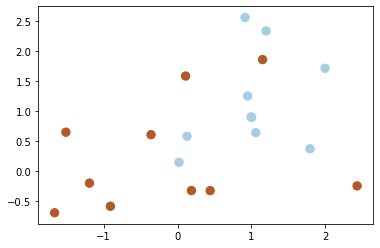

In [3]:
np.random.seed(5)
X = np.random.randn(20, 2)
Y = np.repeat([1, -1], 10)

X[Y == -1] = X[Y == -1] + 1
plt.scatter(x = X[:, 0], y = X[:, 1], c = Y,
            s = 70, cmap = plt.cm.Paired)
plt.show()

In [4]:
model = SVC(C = 1.0, kernel = "linear")
model.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

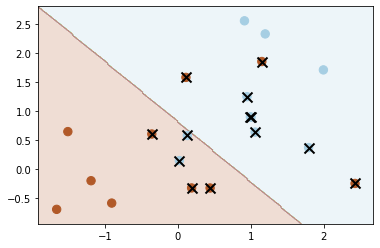

Number of support vectors: 13


In [5]:
plot_svc(model, X, Y)

Se impostiamo un valore di *C* inferiore otteniamo un margine più ampio e quindi più support vectors:

In [6]:
model = SVC(C = 0.1, kernel = "linear")
model.fit(X, Y)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

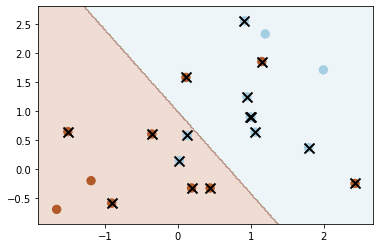

Number of support vectors: 16


In [7]:
plot_svc(model, X, Y)

Usiamo la *CV* per individuare il miglior valore per *C*:

In [8]:
params = [{"C": [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
gs = GridSearchCV(SVC(kernel = "linear"),
                  params, cv = 10,
                  scoring = "accuracy",
                  return_train_score=False)
gs.fit(X, Y)
gs.best_params_

{'C': 0.001}

---

<a id="svm"></a>
# Support Vector Machines

Nei problemi reali accade spesso che le classi non siano linearmente separabili, e in tali scenari il *support vector classifier* non fornisce risultati accurati.

Una delle tecniche più comuni in casi simili consiste nell'allargare il *feature space* applicando delle trasformazioni ai predittori; l'approccio più noto resta l'aggiunta di termini polinomiali calcolati come potenze dei predittori originali. Ad esempio, al posto di addestrare un *support vector classifier* con le $p$ *features* $X_1,\dots,X_p$, potremmo usare le seguenti $2p$ *features*: $X_1,\dots,X_p,X_1^2,\dots,X_p^2$.

Da notare come nel *feature space* allargato il *decision boundary* prodotto da questo insieme di predittori sia comunque lineare, mentre la sua rappresentazione nel *feature space* originale, al contrario, è non lineare!

Basti pensare ad uno scenario univariato in cui le classi non sono linearmente separabili: se aggiungo un secondo predittore pari al quadrato dell'unico predittore a disposizione, le classi diventano separabili, ed il *decision boundary* in due dimensioni è lineare, ma dal punto di vista univariato (cioè relativo solo al predittore originale), ho generato una separazione non lineare!

<br>

Le **support vector machines** sono un'estensione del *support vector classifier* la cui caratteristica distintiva è che implementano l'ingrandimento del *feature space* per risolvere problemi di non separabilità lineare delle classi attraverso l'introduzione dei cosiddetti **kernels**.

E' possibile dimostrare (non so ancora come) che la soluzione al problema di massimizzazione del *support vector classifier* si basa solo sull'**inner product** delle osservazioni e non sui valori delle stesse prese singolarmente.

$$\large <x_a,x_b>=\sum_{j=1}^{p}x_{aj}\cdot x_{bj}$$

Più precisamente, si può dimostrare che il modello risultante dalla risoluzione del problema di ottimizzazione del *support vector classifier* può essere rappresentato nella seguente forma:

$$\large f(x)=\beta_0+\sum_{i=1}^{n}\alpha_i \cdot <x,x_i>$$

Tale modello risulta caratterizzati da $n$ parametri $\alpha_i$, uno per ogni osservazione di *training* e da una singola *intercept* $\beta_0$.

Per stimare tutti questi parametri abbiamo bisogno soltanto degli $\binom{n}{2}=n(n-1)/2$ *inner products* $<x_a,x_b>$ di tutte le coppie di osservazioni di *training*.

Questa forma particolare del modello $f(x)$ ha però un'interessante proprietà: il parametro $\alpha_i$ risulta non-nullo solo per i *support vectors* della soluzione, ed è nullo per tutti gli altri *data points*. Di conseguenza, se definiamo con $S$ l'insieme degli indici di tutti i *support points*, possiamo riscrivere $f(x)$ in una forma che richiede molti meno termini per essere calcolata:

$$\large f(x)=\beta_0+\sum_{i\in S}\alpha_i\cdot <x,x_i>$$

Adesso supponiamo di poter sostituire ogni singolo *inner product* con una sua *generalizzazione*:

$$\large K(x_a,x_b)$$

Questa $K$ è un *kernel*, cioè una funzione che quantifica la similarità fra due osservazioni. Ad esempio, potremmo usare un **linear kernel** in sostituzione dell'*inner product*:

$$\large K(x_a,x_b)=\sum_{j=1}^{p}x_{aj}\cdot x_{bj}$$

In questo caso, però, otterremmo come risultato il semplice *support vector classifier*, perché non abbiamo introdotto alcuna variazione nella computazione.

Potremmo usare un **polynomial kernel**:

$$\large K(x_a,x_b)=\left(1+\sum_{j=1}^{p}x_{aj}\cdot x_{bj}\right)^d$$

Già utilizzando un *degree* $d$ superiore ad uno saremmo in grado di addestrare un modello con un *decision boundary* molto più flessibile rispetto al caso lineare, e la motivazione è la stessa di prima: stiamo cercando di addestrare un *support vector classifier* in uno spazio a dimensionalità più alta utilizzando dei polinomi di grado $d$ al posto del *feature space* originale.

Quando il *support vector classifier* è combinato con un *kernel* non lineare, il classificatore risultante prende il nome di **support vector machine**.

Un'altra alternativa comune è il **radial kernel**:

$$\large K(x_a,x_b)=exp\left( -\gamma\sum_{j=1}^{p}(x_{aj}-x_{bj})^2 \right)$$

Se definiamo $\gamma$ come una costante positiva, come funziona il *radial kernel*? Se un'osservazione di test $x_a$ è lontana da un'osservazione di *training* $x_b$ in termini di distanza euclidea, allora il termine in sommatoria sarà molto grande, rendendo il valore dell'esponenziale (e quindi del *kernel*) molto piccolo. Questo vuol dire che $x_b$ non darà un grande contributo al calcolo di $f(x_a)$, e noi sappiamo che la *predicted class* per $x_a$ dipenderà dal segno di $f(x_a)$. In parole povere, le osservazioni di *training* molto lontane dall'osservazione di test non avranno ruolo nell'individuazione della classe per $x_a$.

Si può dire che il *radial kernel* ha un comportamento molto *locale*, come a dire che solo le osservazioni di *training* estremamente vicine possono contribuire a classificare un'istanza di test.

Nei due plot che seguono mostriamo l'applicazione di un kernel polinomiale di grado tre e di un kernel radiale:

<img src="imgs/svm.PNG"/>

Il vantaggio principale dell'adozione dei *kernel* in sostituzione al classico ingrandimento del *feature space* con termini aggiuntivi è tutto computazionale: usando i *kernel*, infatti, dobbiamo calcolare $K(x_a,x_b)$ solo per $\binom{n}{2}$ coppie distinte, e non dobbiamo nemmeno aggiungere concretamente dei predittori al problema.

<br>

Per estendere una *support vector machine* a problemi con più di due classi, abbiamo due approcci possibili:

- **One-Versus-One Classification**: si addestrano $\binom{K}{2}$ modelli, ognuno dei quali si concentra solo su una coppia di classi. Si passa la generica osservazione di test come input di ciascuno di questi modelli e si restituisce come *output* finale la classe che questi restituiscono con maggior frequenza.


- **One-Versus-All Classification**: si addestrano $K$ modelli, ognuno dei quali prova a separare una classe da tutte le altre. La generica osservazione di test $x^*$ è passata in input a tutti i modelli $f_1,\dots,f_K$ ed è associata alla classe corrispondente al modello che presenta il valore massimo di $f(x^*)$.

<br>

Facciamo un esempio con un dataset fittizio:

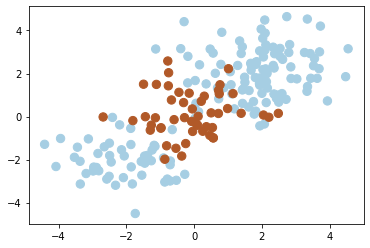

In [9]:
np.random.seed(8)
X = np.random.randn(200, 2)
X[:100] = X[:100] + 2
X[101:150] = X[101:150] - 2
Y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.5,
                                                    random_state = 2)

plt.scatter(X[:, 0], X[:, 1], c = Y,
            s = 70, cmap = plt.cm.Paired)
plt.show()

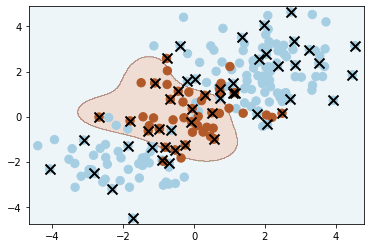

Number of support vectors: 51


In [10]:
model = SVC(C = 1.0, kernel = "rbf", gamma = 1)
model.fit(X_train, Y_train)

plot_svc(model, X, Y)

Aumentiamo *C* per aggiungere flessibilità al modello:

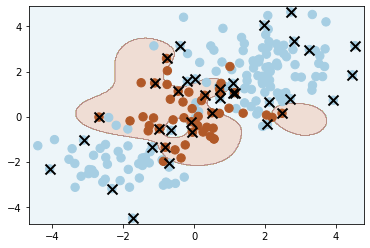

Number of support vectors: 36


In [11]:
model = SVC(C = 100, kernel = "rbf", gamma = 1)
model.fit(X_train, Y_train)

plot_svc(model, X, Y)

Usiamo la *CV* per trovare i migliori valori per *C* e $\gamma$:

In [12]:
params = [{"C": [0.01, 0.1, 1, 10, 100],
           "gamma": [0.5, 1, 2, 3, 4]}]

gs = GridSearchCV(SVC(kernel = "rbf"),
                  params, cv = 10,
                  scoring = "accuracy",
                  return_train_score=False)
gs.fit(X_train, Y_train)
gs.best_params_

{'C': 10, 'gamma': 0.5}

Sui dati di test abbiamo un 13% circa di osservazioni *misclassified*.

In [13]:
gs.best_estimator_.score(X_test, Y_test)

0.87

---